In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
!python3 -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [4]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('2023') if '.txt' in b.name]

In [5]:
all_books

[<DirEntry '2023.txt'>]

In [6]:
book = all_books[0]
# book = cryptojacking
book_text = open(book).read()
print(book_text)

In cloud environments, cryptojacking – a type of cyberattack that uses computing power to mine cryptocurrency – takes the form of cloud compute resource abuse, which involves a threat actor compromising legitimate tenants. Cloud compute resource abuse could result in financial loss to targeted organizations due to the compute fees that can be incurred from the abuse. In attacks observed by Microsoft, targeted organizations incurred more than $300,000 in compute fees due to cryptojacking attacks.

While there are fundamental differences in how cloud providers handle authentication, permissions, and resource creation, a cloud cryptojacking attack could unfold in any environment where a threat actor can compromise an identity and create compute, and the attack lifecycle is largely the same. Microsoft security experts have surfaced tell-tale deployment patterns to help defenders determine, identify, and mitigate cloud cryptojacking attacks.

To perform cloud cryptojacking, threat actors mu

In [7]:
all_entities = NER(book_text)

In [8]:
entity_types_to_remove = ["CARDINAL", "TIME", "DATE", "ORDINAL", "QUANTITY", "PERCENT", "MONEY"]
filtered_entities =[ent.text for ent in all_entities.ents if ent.label_ not in entity_types_to_remove]
print(filtered_entities)

['Microsoft', 'Microsoft', 'Cloud Apps', 'CPU', 'GPU', 'Mask', 'Graphical', 'Microsoft Incident Response', 'MFA', 'Graphical', 'Hunt', 'Microsoft Defender for Cloud Apps', 'Microsoft', 'Microsoft Incident Response', 'RBAC', 'Quota', 'GPU', 'GPU', 'NVIDIA', 'AMD GPU', 'CPU', 'GPU', 'GPU', 'V100', 'GPU', 'NVIDIA', 'A100', 'ASIC', 'NVIDIA GPU', 'Compute Unified Device Architecture', 'CUDA', 'NVIDIA', 'CUDA', 'GPU', 'Ethereum Proof of Work', 'ETHW', 'GPU', 'CUDA', 'ETHW', 'NC', 'NVIDIA', 'NVIDIA', 'ND', 'A100', 'NVIDIA', 'A100', 'GB', 'the Ethereum Proof', 'NVIDIA GPU', 'Microsoft', 'Azure Machine Learning', 'Azure Batch', 'Azure Container Instances', 'NVIDIA', 'VM', 'Microsoft Threat Intelligence', 'GPU', 'GPU', 'Compute', 'Microsoft', 'Azure ML', 'Azure Batch', 'Azure Container Instances', 'GPU', 'Azure Virtual Machine', 'NVIDIA', 'Linux', 'AMD', 'Windows', 'Sudden', 'GPU', 'GPU Driver Extension', 'GPU', 'VM', 'Microsoft Defender for Cloud', 'nicehash[.]com', 'minexmr[.]com', 'Microsoft 

In [9]:
# Visualize identified entities
displacy.render(all_entities[0:2000], style="ent", jupyter=True)

## Get named entity list per sentence

In [10]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in all_entities.sents:
    entity_list = [ent.text for ent in sent.ents if ent.label_ not in entity_types_to_remove]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)
print(sent_entity_df.head(10))

                                            sentence     entities
0  (In, cloud, environments, ,, cryptojacking, –,...           []
1  (Cloud, compute, resource, abuse, could, resul...           []
2  (In, attacks, observed, by, Microsoft, ,, targ...  [Microsoft]
3  (While, there, are, fundamental, differences, ...           []
4  (Microsoft, security, experts, have, surfaced,...  [Microsoft]
5  (To, perform, cloud, cryptojacking, ,, threat,...           []
6  (If, the, credentials, do, not, have, the, thr...           []
7  (In, some, cases, ,, threat, actors, hijack, e...           []
8  (Once, access, to, the, tenant, is, gained, ,,...           []
9  (Threat, actors, use, these, deployed, resourc...           []


In [11]:
sent_entity_df

,sentence,entities
0,"(In, cloud, environments, ,, cryptojacking, –,...",[]
1,"(Cloud, compute, resource, abuse, could, resul...",[]
2,"(In, attacks, observed, by, Microsoft, ,, targ...",[Microsoft]
3,"(While, there, are, fundamental, differences, ...",[]
4,"(Microsoft, security, experts, have, surfaced,...",[Microsoft]
...,...,...
798,"(Microsoft, 365, Defender, customers, who, hav...","[Microsoft, 365 Defender, Microsoft Defender f..."
799,"(The, following, Microsoft, Defender, for, Clo...","[Microsoft Defender for Cloud Application, Mul..."
800,"(If, the, TI, Map, analytics, are, not, curren...","[the Microsoft Sentinel Content Hub, Sentinel]"
801,"(More, details, on, the, Content, Hub, can, be...",[]


In [12]:
# Filter out sentences that don't have any entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

,sentence,entities
2,"(In, attacks, observed, by, Microsoft, ,, targ...",[Microsoft]
4,"(Microsoft, security, experts, have, surfaced,...",[Microsoft]
13,"(We, also, provide, information, on, how, Micr...",[Cloud Apps]
17,"(Cryptocurrency, mining, using, central, proce...","[CPU, GPU]"
21,"(Mask, resource, provisioning, activity, as, l...",[Mask]
26,"(Graphical, diagram, of, a, cryptojacking, att...",[Graphical]
33,"(Microsoft, Incident, Response, investigations...","[Microsoft Incident Response, MFA]"
37,"(Graphical, diagram, of, the, attack, cycle, w...",[Graphical]
46,"(Subscription, hijacking, has, been, covered, ...","[Hunt, Microsoft Defender for Cloud Apps]"
49,"(In, cases, observed, by, Microsoft, ,, the, d...",[Microsoft]


In [13]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

,sentence,entities
2,"(In, attacks, observed, by, Microsoft, ,, targ...",[Microsoft]
4,"(Microsoft, security, experts, have, surfaced,...",[Microsoft]
13,"(We, also, provide, information, on, how, Micr...",[Cloud Apps]
17,"(Cryptocurrency, mining, using, central, proce...","[CPU, GPU]"
21,"(Mask, resource, provisioning, activity, as, l...",[Mask]
...,...,...
797,"(Microsoft, 365, Defender, uses, its, cross, -...","[Microsoft, 365 Defender]"
798,"(Microsoft, 365, Defender, customers, who, hav...","[Microsoft, 365 Defender, Microsoft Defender f..."
799,"(The, following, Microsoft, Defender, for, Clo...","[Microsoft Defender for Cloud Application, Mul..."
800,"(If, the, TI, Map, analytics, are, not, curren...","[the Microsoft Sentinel Content Hub, Sentinel]"


## Create relationships

In [14]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [15]:
relationship_df = pd.DataFrame(relationships)

In [16]:
pd.set_option('display.max_rows', None)
relationship_df

,source,target
0,Cloud Apps,CPU
1,CPU,GPU
2,Cloud Apps,CPU
3,CPU,GPU
4,CPU,GPU
5,CPU,GPU
6,CPU,GPU
7,GPU,Mask
8,CPU,GPU
9,GPU,Mask


In [17]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

,source,target
0,CPU,Cloud Apps
1,CPU,GPU
2,CPU,Cloud Apps
3,CPU,GPU
4,CPU,GPU
5,CPU,GPU
6,CPU,GPU
7,GPU,Mask
8,CPU,GPU
9,GPU,Mask


In [18]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [19]:
relationship_df.head(10)

,source,target,value
0,CPU,Cloud Apps,4
1,CPU,GPU,22
2,GPU,Mask,4
3,Graphical,Mask,2
4,MFA,Microsoft Incident Response,20
5,Graphical,MFA,4
6,Hunt,Microsoft Defender for Cloud Apps,12
7,Microsoft,Microsoft Defender for Cloud Apps,6
8,Microsoft,Microsoft Incident Response,8
9,Microsoft Incident Response,RBAC,8


## Graph analysis and visualization

In [20]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

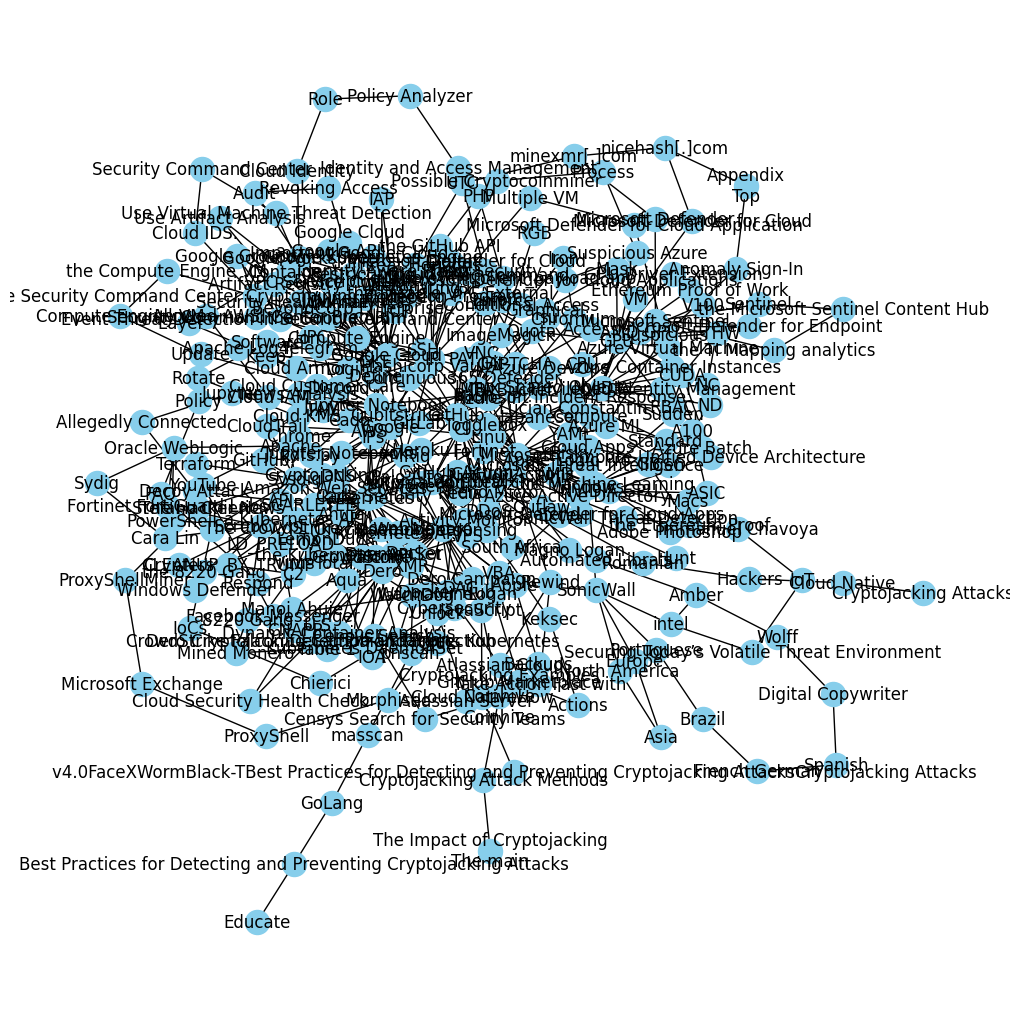

In [21]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [22]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

witcher.html


### The most important characters in The Witcher

In [23]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'CPU': 0.015822784810126583,
 'Cloud Apps': 0.00949367088607595,
 'GPU': 0.05063291139240506,
 'Mask': 0.006329113924050633,
 'Graphical': 0.006329113924050633,
 'MFA': 0.022151898734177215,
 'Microsoft Incident Response': 0.02531645569620253,
 'Hunt': 0.0031645569620253164,
 'Microsoft Defender for Cloud Apps': 0.006329113924050633,
 'Microsoft': 0.05379746835443038,
 'RBAC': 0.0031645569620253164,
 'Quota': 0.012658227848101266,
 'NVIDIA': 0.03164556962025317,
 'AMD GPU': 0.006329113924050633,
 'V100': 0.0031645569620253164,
 'A100': 0.012658227848101266,
 'ASIC': 0.006329113924050633,
 'NVIDIA GPU': 0.012658227848101266,
 'Compute Unified Device Architecture': 0.006329113924050633,
 'CUDA': 0.012658227848101266,
 'Ethereum Proof of Work': 0.006329113924050633,
 'ETHW': 0.012658227848101266,
 'NC': 0.006329113924050633,
 'ND': 0.006329113924050633,
 'GB': 0.012658227848101266,
 'the Ethereum Proof': 0.006329113924050633,
 'Azure Machine Learning': 0.006329113924050633,
 'Azure Batch

<Axes: >

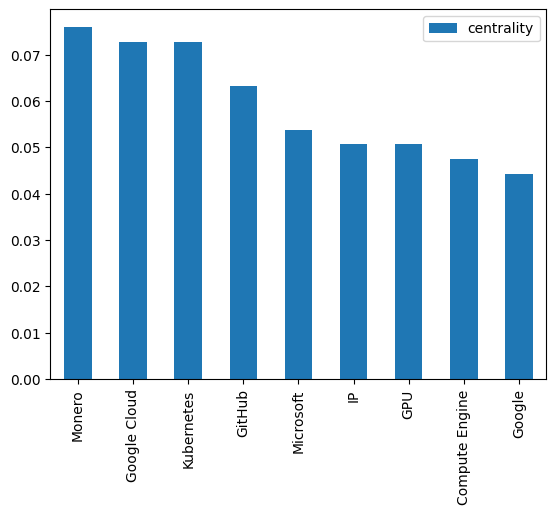

In [24]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

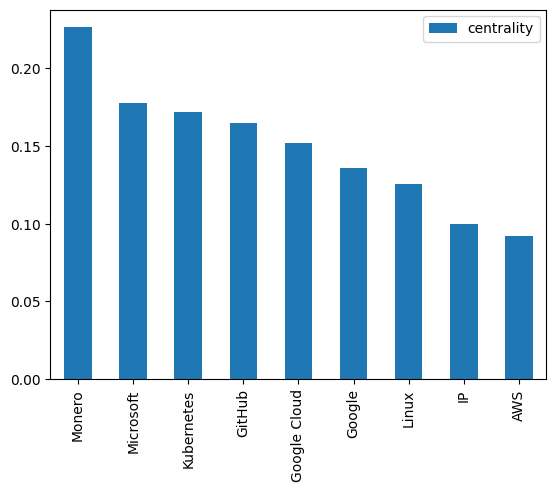

In [25]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<Axes: >

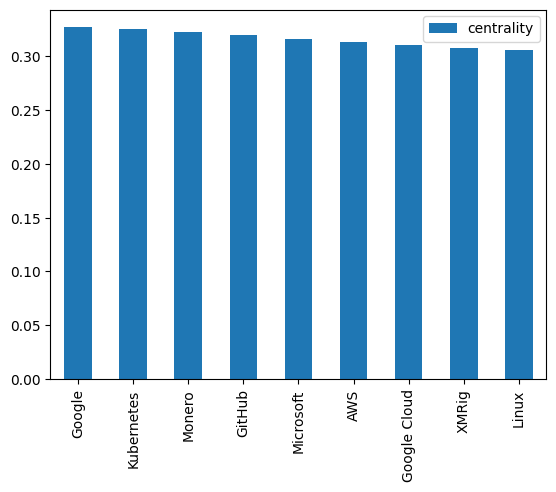

In [26]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [27]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [28]:
!pip install python-louvain

### Community detection

In [29]:
from community import community_louvain

In [30]:
communities = community_louvain.best_partition(G)

In [31]:
communities

{'CPU': 0,
 'Cloud Apps': 0,
 'GPU': 5,
 'Mask': 3,
 'Graphical': 3,
 'MFA': 3,
 'Microsoft Incident Response': 3,
 'Hunt': 3,
 'Microsoft Defender for Cloud Apps': 3,
 'Microsoft': 3,
 'RBAC': 3,
 'Quota': 3,
 'NVIDIA': 5,
 'AMD GPU': 0,
 'V100': 5,
 'A100': 5,
 'ASIC': 5,
 'NVIDIA GPU': 5,
 'Compute Unified Device Architecture': 5,
 'CUDA': 5,
 'Ethereum Proof of Work': 5,
 'ETHW': 5,
 'NC': 5,
 'ND': 5,
 'GB': 5,
 'the Ethereum Proof': 5,
 'Azure Machine Learning': 5,
 'Azure Batch': 5,
 'Azure Container Instances': 5,
 'VM': 5,
 'Compute': 5,
 'Azure ML': 4,
 'Azure Virtual Machine': 5,
 'Linux': 5,
 'AMD': 5,
 'Windows': 5,
 'Sudden': 5,
 'GPU Driver Extension': 5,
 'Microsoft Defender for Cloud': 5,
 'nicehash[.]com': 4,
 'minexmr[.]com': 4,
 'Microsoft Defender': 4,
 'Microsoft Sentinel': 4,
 'Privileged Identity Management': 3,
 'Conditional Access': 3,
 'Azure Active Directory': 3,
 'Standard': 3,
 'Microsoft Threat Intelligence': 3,
 '365 Defender': 3,
 'Access': 3,
 'Risky':

In [32]:
nx.set_node_attributes(G, communities, 'group')

In [33]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_2023.html")

witcher_2023.html


### Evolution of characters' importance

In [34]:
from lib.utils.functions import *

In [35]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('2023') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [36]:
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['entities'].map(len) > 0]

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G)


AttributeError: 'DataFrame' object has no attribute 'character_entities'

In [ ]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()